**OLA TESTING**

##### Un poco de contexto
Como hemos visto, desde la teoria y los papers sabemos que OLA no funciona bien con señales armonicas, ya que no es capaz de preservar estructuras periodicas locales en la señal de entrada. En la señal de salida, los patrones periodicos son distorsionados, a lo que se denomina 'artefactos de saltos de fase'.

Pero este algoritmo en teoria entrega buenos resultados con señales percusivas, como por ejemplo baterias.
Esto es así debido a que las señales con contenido percusivo carecen de estructuras locales periódicas, por lo que, los artefactos de saltos de fase no son notables en la señal de salida. 


Segun Driedger y Muller, es importante utilizar un largo de frame M muy pequeño 
(aproximadamente 10ms) para reducir el efecto indeseado de duplicacion de transientes.
Esta duplicación de transientes sucede ya que al recolocar los frames y copiarlos en la señal de salida, si la transiente aparece en dos frames, será duplicada en la salida y se escuchará dos veces en una rápida sucesión, lo que es indeseado y antinatural para esta aplicación. 

##### A tener en cuenta en este testeo

Primero podemos hacer unas pruebas basicas con señales armonicas vs percusivas con el N recomendado de ventana de 10 ms, para corroborar las premisas vistas, subjetivamente.

Podemos hacer varias pruebas con distintos audios percusivos, por ejemplo: baterías acústicas, platillos, tambores, shakers, mallets, baterias electrónicas, entre otros, variando el tamaño de ventana y observando el comportamiento.

A modo de testeo objetivo: podemos comparar el comportamiento del algoritmo con señales diseñadas en python (senos) contra el resultado ideal, que seria diseñar esa misma señal pero con la escala temporal modificada.





In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import ola   
from IPython.display import Audio
from utils.wav_utils import read_wav, save_wav 

'''
como algunos import no me andan por lo de los directorios, copio esas funciones aca, pero
habria que arreglar eso bien despues
'''

'\ncomo algunos import no me andan por lo de los directorios, copio esas funciones aca, pero\nhabria que arreglar eso bien despues\n'

In [2]:
#Funcion para plotear las dos funciones y comparar el efecto de la TSM aplicada
def basic_plot_comparison(x1,x2,fs):
    """Plot two signals. Compare the signal before and after applying the TSM algorithm.

    Args:
        x1 (np.array): Original signal.
        x2 (np.array): Modified signal.
        fs (int): Sample rate.
    """
    fig, ax = plt.subplots(2, 1)

    t1 = np.linspace(0, len(x1)/fs, len(x1))
    ax[0].set_title("Señal original vs Señal con TSM")
    ax[0].plot(t1, x1)
    ax[0].set_ylabel("Amplitude")
    ax[0].set_xlabel("Time")
    if len(x1)/fs > len(x2)/fs:
        ax[0].set_xlim([0,len(x1)/fs])
    else:
        ax[0].set_xlim([0,len(x2)/fs])

    t2 = np.linspace(0, len(x2)/fs, len(x2))
    ax[1].plot(t2, x2)
    ax[1].set_ylabel("Amplitude")
    ax[1].set_xlabel("Time")
    if len(x1)/fs > len(x2)/fs:
        ax[1].set_xlim([0,len(x1)/fs])
    else:
        ax[1].set_xlim([0,len(x2)/fs])

    plt.show()

    return

In [3]:
#funcion de quick test OLA
def quick_test_OLA(path, N,fs, alpha, Hs,savename):
    '''
    Computes the TSM with the OLA procedure to a given signal audio file.

    Parameters:

    path: directory of the audio sample
    N (int): Number of samples for the window
    fs (int): Sample rate
    alpha (float): Stretching factor.
    Hs (int): Synthesis hopsize length.
    savename (boolean): Optional. Necessary for saving the file.
    '''
    
    x, _ = read_wav(path, fs)
    x_out = ola.TSM_OLA(x,N,alpha,Hs) 

    if savename:
        nameout = "audios_mod/prueba_ola.wav"
        save_wav(x_out, fs, nameout)

    return x, x_out

**##### Algunas pruebas iniciales, con señales reales, armonicas y percusivas**

Observacion:
tamaño de ventana en segundos: w_size = N/fs

Para fs = 44100

algunos casos:
Si N = 441 -> w_size = 10 ms

Si N = 882 -> w_size = 20 ms

Si N = 1024 -> w_size = 23 ms

Si N = 2048 -> w_size = 46 ms

Si N = 4096 -> w_size = 92 ms

Si N = 8192 -> w_size = 184 ms

PRUEBA A: Aca voy a ir probando con el audio synth (armonico) con el tamaño de ventana recomendado (10ms) , HS = N//2 y variando el alpha.

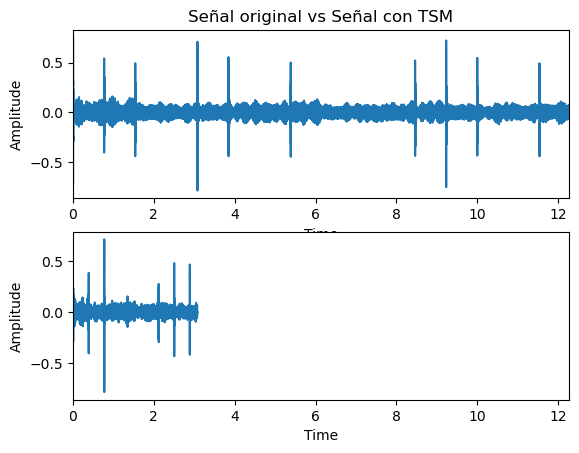

'\nOBSERVACION\nPara determinados valores de alpha, tira el error:\n45     y[m * Hs: N + (m * Hs)] += (x_m*w)/(w_norm) \nValueError: operands could not be broadcast together with shapes (381,) (441,) (381,)\n\nREVISAR ESTO y adaptar codigo para q no pase\n\n'

In [4]:
'''
PRUEBA1 - signal: synth (armonica) - fs=44100 - N=441 (10ms) - alpha=variable - Hs=N/2
'''

synth, synth_prueba1 = quick_test_OLA('audios/synth.wav',441,44100,0.25,441//2,True)

basic_plot_comparison(synth,synth_prueba1,44100) 

'''
OBSERVACION
Para determinados valores de alpha, tira el error:
45     y[m * Hs: N + (m * Hs)] += (x_m*w)/(w_norm) 
ValueError: operands could not be broadcast together with shapes (381,) (441,) (381,)

REVISAR ESTO y adaptar codigo para q no pase

'''

In [13]:
#Escucho señal original
Audio(synth, rate=44100) 

In [65]:
#Escucho señal modificada
Audio(synth_prueba1, rate=44100) 

CONCLUSIONES:
En general varia mucho el pitch, la modificacion de escala no suena natural.
A medida que aumentamos y  alpha: el pitch disminuye considerablemente y no suena agradable, como era esperado bajo este tipo de señales.


PRUEBA B: Aca voy a ir probando con un audio percusivo con el tamaño de ventana recomendado (10ms) , HS = N//2 y variando el alpha. La idea es corroborar que el TSM de buenos resultados para este tipo de señal.

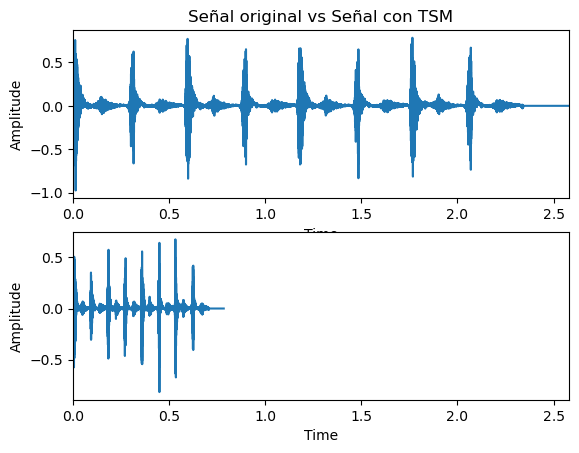

In [95]:
'''
PRUEBA2 - signal: shaker (percusiva) - fs=44100 - N=441 (10 ms) - alpha=variable - Hs=N/2
'''

#shaker, shaker_prueba1 = quick_test_OLA('audios/shaker.wav',441,44100,.3,441//2,True)

#basic_plot_comparison(shaker,shaker_prueba1,44100) 

In [67]:
#Escucho señal original
#Audio(shaker, rate=44100)  

In [96]:
#Escucho señal modificada
#Audio(shaker_prueba1, rate=44100)

CONCLUSIONES:
Aumentando alpha: se nota bastante el cambio de pitch.
Disminuyendo alpha: dentro de todo no se nota el cambio de pitch.


Ahora probemos con un alpha y N fijo pero variando el hopsize

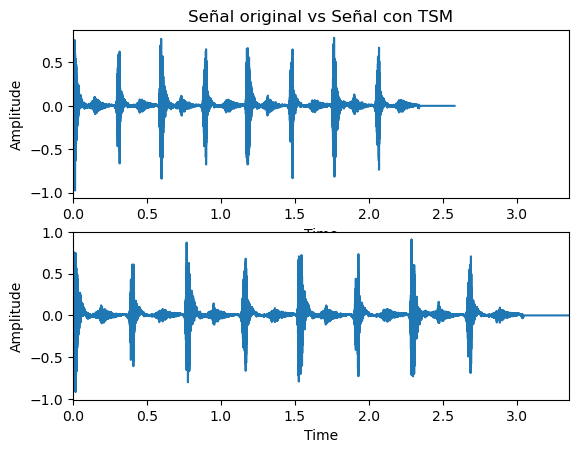

'\nPara diversos casos de tamaño de HS tira el mismo error:\n45     y[m * Hs: N + (m * Hs)] += (x_m*w)/(w_norm) \nValueError: operands could not be broadcast together with shapes (381,) (441,) (381,)\n\n'

In [156]:
'''
PRUEBA3 - signal: shaker (percusiva) - fs=44100 - N=441 (10 ms) - alpha=variable - Hs=variable
'''

#shaker, shaker_prueba2 = quick_test_OLA('audios/shaker.wav',441,44100,1.3,160,True)

#basic_plot_comparison(shaker,shaker_prueba2,44100) 

'''
Para diversos casos de tamaño de HS tira el mismo error:
45     y[m * Hs: N + (m * Hs)] += (x_m*w)/(w_norm) 
ValueError: operands could not be broadcast together with shapes (381,) (441,) (381,)

'''

In [157]:
#Escucho señal modificada
#Audio(shaker_prueba2, rate=44100)

CONCLUSIONES?
Para HS=N//2 suele andar bien. 
Salvando los casos donde el codigo crashea, si disminuimos el Hs varia el pitch.

Lo que habria que ser es, primero verificar el codigo de OLA para prevenir los casos donde no es posible computar y con el alpha o Hs dado, y a partir de eso, hacer una funcion para hacer estos test de forma mas automatizada.